# 8. 游戏设计
游戏设计是 [CodeLab 社区](https://create.codelab.club/)热门的创作主题。你喜欢什么游戏？你觉得好玩的游戏有什么共同特征呢？本单元我们将探索如何记录游戏数据，制作游戏排行榜，一起来探索游戏设计的奥秘吧！
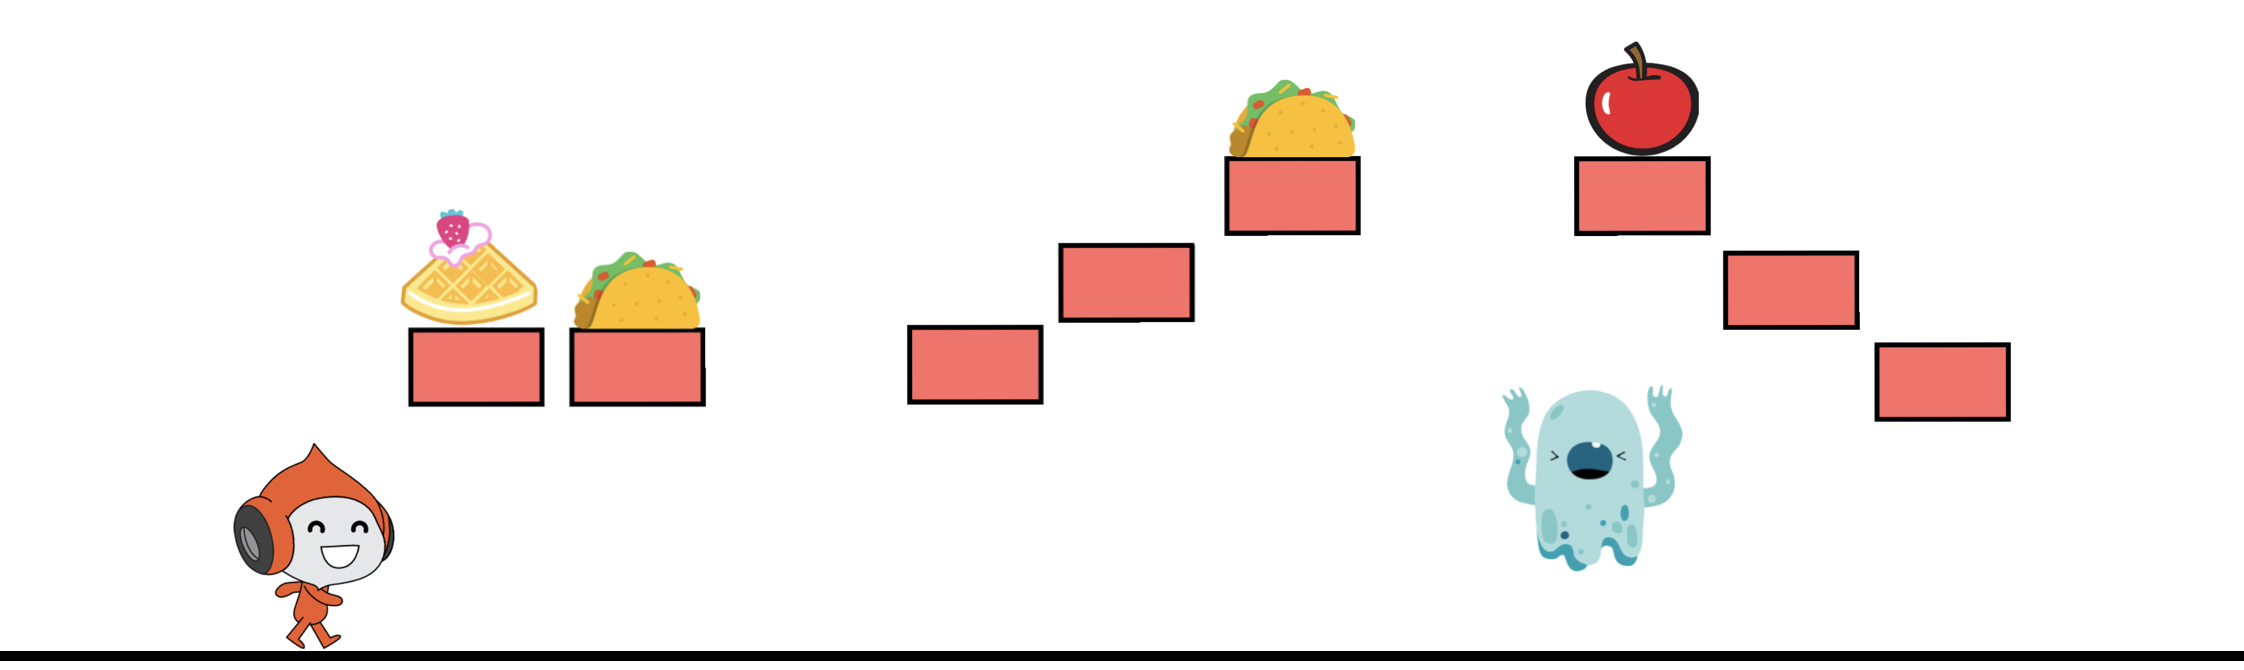

## 记录游戏数据
先体验[火柴人平台游戏](https://create.codelab.club/projects/5975/)，如果不了解如何设计游戏，可以先学习【创意编程】课程的[第 7 课](https://creative-coding.codelab.club/07-you-xi-she-ji-shang)和[第 8 课](https://creative-coding.codelab.club/08-you-xi-she-ji-xia)。

In [ ]:
# 火柴人平台游戏
from IPython.display import IFrame

IFrame('https://create.codelab.club/projects/5975/fullscreen/', width="100%", height=500)

有的游戏有进度存档的功能，这样游戏不用每次都从头开始，接下来我们给火柴人平台游戏也添加存档的功能。首先确定需要保存的数据，如角色位置、关卡、生命值，然后将这些数据保存在一个 txt 文档中。

In [ ]:
#【交互计算】火柴人平台游戏 https://create.codelab.club/projects/9476/editor/
from codelab_adapter_client.message import send_message, receive_message

while True: 
    msg = receive_message()
    if msg:
        if msg == '读档':
            # 读取文件内容
            with open('gameData.txt', 'r') as f:
                send_message(f.read())            
        else:
            # 向文件写入内容
            with open('gameData.txt', 'w') as f:
                f.write(msg)

### 编程百科
#### 文件读写
Python 可以很方便地向文件写入内容。写入内容前，先确保文件存在。在“交互计算”文件夹下先新建一个名为 test.txt 的文件。

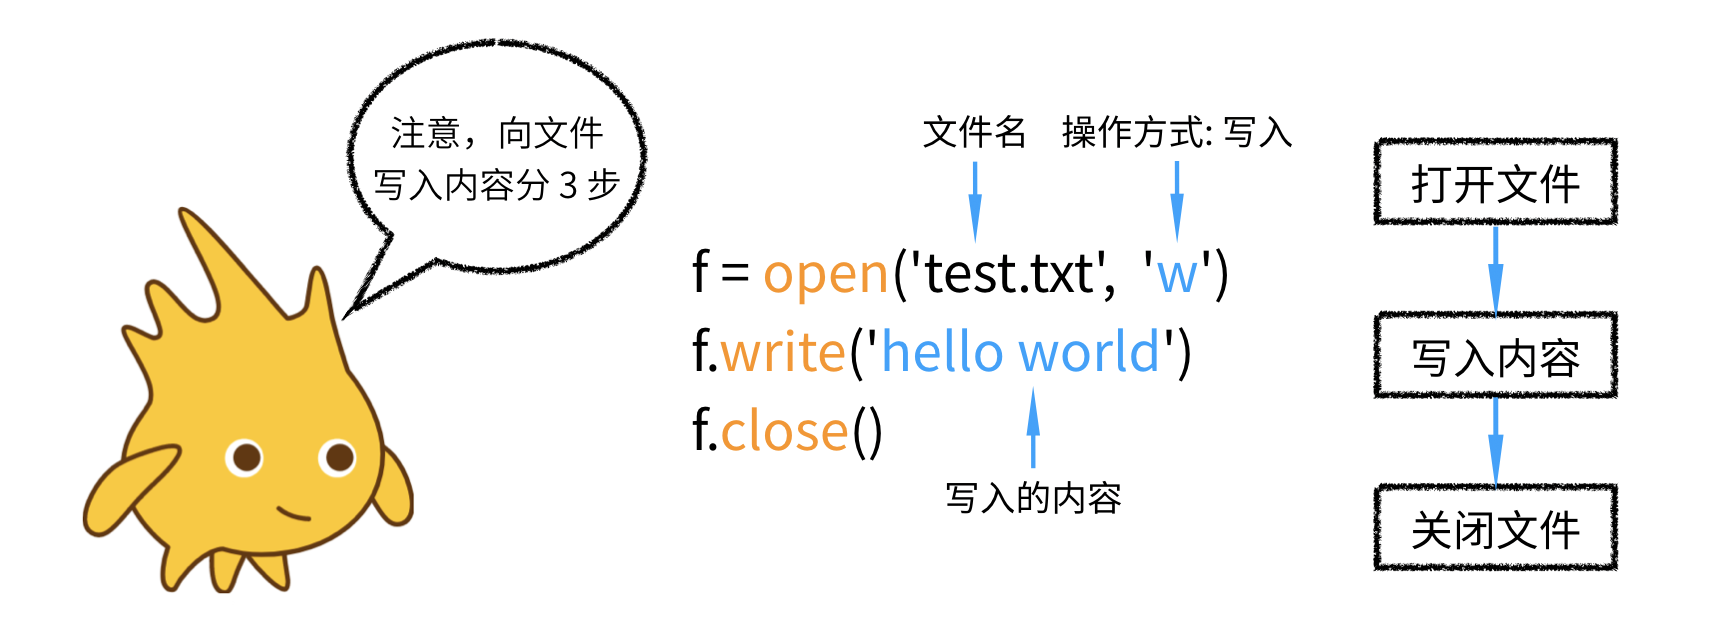

注意，操作方式 w、r、a、r+ 分别代表写入 (write)，读取 (read)，追加内容 (append)，读写，在打开文件时要指明要对文件进行什么操作。

In [ ]:
# 写入内容
f = open('test.txt', 'w')
f.write('hello world')
f.close()

In [ ]:
# 新增内容
f = open('test.txt', 'a')
# \n 代表换行
f.write('\n')
# 写入第二行内容
f.write('second line')
f.close()

In [ ]:
# 读取内容
f = open('test.txt', 'r')
a = f.read()
f.close()
print(a)

注意，读取或写入内容后，要记得使用 close() 关闭文件，还有一个更简单的方法可以自动调用 close()，即使用 with open() as 的形式。

In [ ]:
# 自动调用 close()
with open('test.txt', 'r') as f:
    print(f.read())

使用 read() 会一次读取文件的所有内容，如果想逐行读取内容，则可以使用循环来遍历整个文件内容：

In [ ]:
with open('test.txt', 'r') as f:
    # 按行读取内容
    for line in f:
        print(line)  

或者使用 readlines()，它会以列表的形式存放所有行的内容。

In [ ]:
with open('test.txt', 'r') as f:
    content = f.readlines()
    print(content)
    for line in content:
        print(line)       

#### 文件路径
文件路径是指文件在计算机中的位置，打开文件时要指明文件的路径。文件路径可分为绝对路径和相对路径。

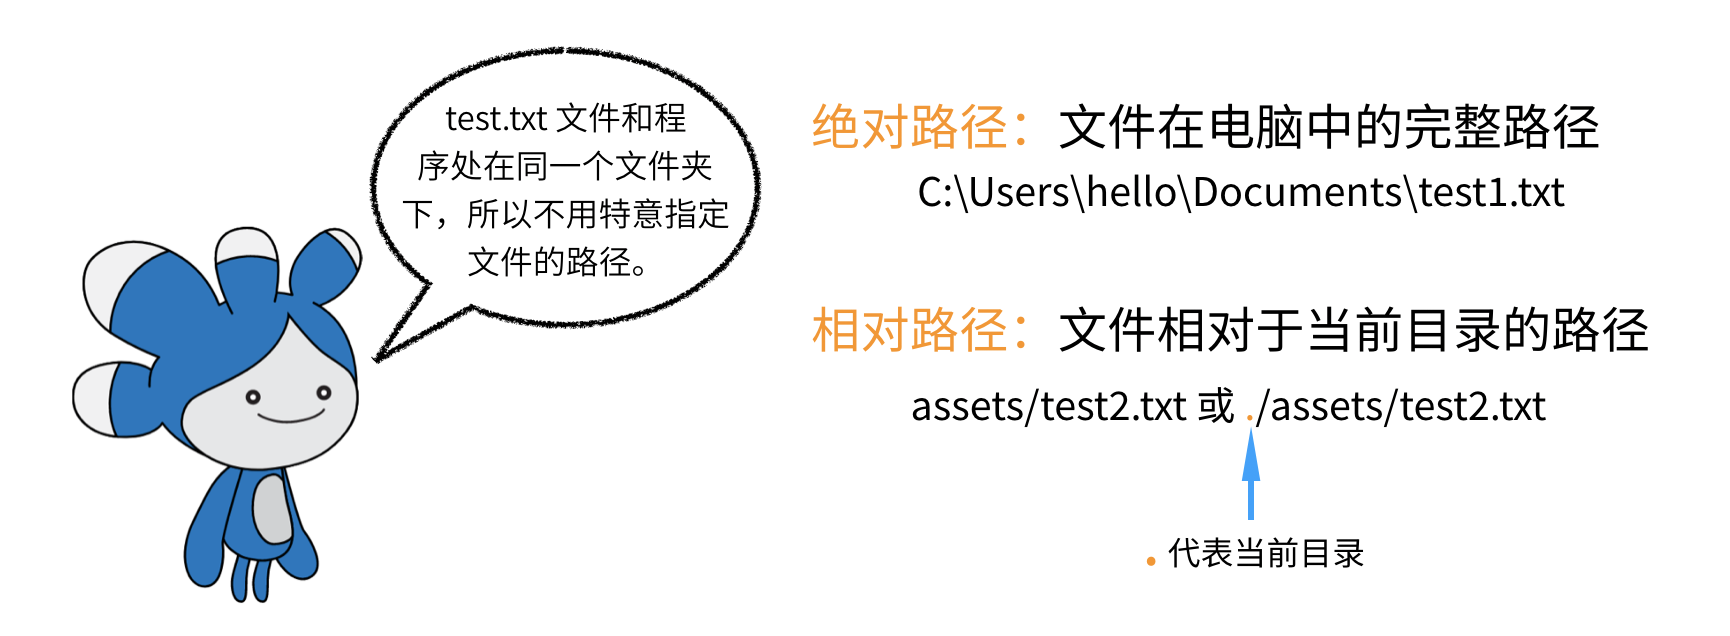

In [ ]:
# 读取绝对路径下的文件，请根据文件的实际位置设置文件路径
with open(r'C:\Users\hello\Documents\test1.txt', 'r') as f1:
    print(f1.read())

# 读取相对路径下的文件
with open('assets/test2.txt', 'r') as f2:
    print(f2.read())

## 制作排行榜
先体验[火柴人跑酷](https://create.codelab.club/projects/6442/)游戏，了解游戏玩法。

In [ ]:
# 火柴人跑酷
from IPython.display import IFrame

IFrame('https://create.codelab.club/projects/6442/fullscreen/', width="100%", height=500)

很多游戏可以记录每次游戏的得分，并进行排名。使用文档保存游戏得分后，可以对得分进行排序，制作游戏得分排行榜。

In [ ]:
#【交互计算】火柴人跑酷 https://create.codelab.club/projects/9482/editor
import time
from datetime import datetime
from codelab_adapter_client.message import send_message, receive_message

while True: 
    msg = receive_message()
    if msg:
        if msg == '排名':
            scores = []  
            with open('ranking.txt', 'r') as f:
                for line in f:
                    # strip() 可以去掉换行符，append() 可以在列表末尾添加一个新元素
                    scores.append(line.strip()) 
            # 按得分从高到低进行排序
            scores.sort(key=lambda score: int(score.split(',')[0]), reverse=True)
            len_list = len(scores)
            if len_list > 6:
                len_list = 6
            for i in range(len_list):
                send_message(scores[i])
                time.sleep(0.1)
        else:
            with open('ranking.txt', 'a') as f:
                # 按年月日时分秒的格式记录当前时间
                now = datetime.now()
                now = now.strftime("%Y-%m-%d %H:%M:%S")
                msg = str(msg) + ', ' + now + '\n'
                f.write(msg)

In [ ]:
# 获取当前时间
from datetime import datetime

now = datetime.now()
# 按年月日时分秒的格式记录当前时间
current_time = now.strftime("%Y-%m-%d %H:%M:%S")
print(current_time)

In [ ]:
# 列表排序
scores = [22, 48, 36, 70, 82]
# 从小到大排序
scores.sort()
print(scores)
# 从大到小排序
scores.sort(reverse=True)
print(scores)

In [ ]:
# 去掉换行符
with open('ranking.txt', 'r') as f:
    scores = f.readlines()
    print(scores)
    for line in scores:
        print(line.strip()) # strip() 可以去掉换行符

In [ ]:
# 读取文件并按得分排序
scores = []
with open('ranking.txt', 'r') as f:
    for line in f.readlines():
        scores.append(line.strip()) # append() 可以在列表末尾添加一个新元素
print(scores)
# 按得分从高到低排序
scores.sort(key=lambda score: int(score.split(',')[0]), reverse=True)
print('=' * 60)
print(scores)

以上程序使用了匿名函数，这里不要求掌握。如果想了解更多匿名函数的知识，可以点击[这里](https://python3-cookbook.readthedocs.io/zh_CN/latest/c07/p06_define_anonymous_or_inline_functions.html#id1)。

### 拓展
发挥自己的想象，进一步拓展游戏设计的项目，并将作品分享到[【交互计算】游戏设计](https://create.codelab.club/studios/424/)工作室，看看工作室中其他人创作的作品。
1. 改编[【交互计算】火柴人平台游戏](https://create.codelab.club/projects/9476/)，将火柴人的生命值设为 1，游戏失败时自动记录游戏进度，游戏再次开始后从记录的进度处开始游戏。

2. 改编 [CodeLab 社区](https://create.codelab.club/explore/projects/all)中的一个游戏项目，记录游戏进度或者制作得分排行榜。